In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rectangular_pulse(width, sampling_rate, zero_padding=0.01):

    # Calculate the number of samples for the pulse and padding
    pulse_samples = int(width * sampling_rate)
    padding_samples = int(zero_padding * sampling_rate)

    # Ensure the total_samples for the pulse is odd for symmetry
    if pulse_samples % 2 == 0:
        pulse_samples += 1

    # Create the rectangular pulse
    pulse = np.ones(pulse_samples)

    # Add zeros for padding
    zeros = np.zeros(padding_samples)
    padded_pulse = np.concatenate((zeros, pulse, zeros))

    # Create the corresponding time vector
    total_samples = len(padded_pulse)
    t = np.linspace(
        -zero_padding - (width / 2),
        zero_padding + (width / 2),
        total_samples
    )

    return t, padded_pulse


/Users/ghs6kor/miniconda3/envs/dl_lab_py310/lib/python3.10/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ghs6kor/miniconda3/envs/dl_lab_py310/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


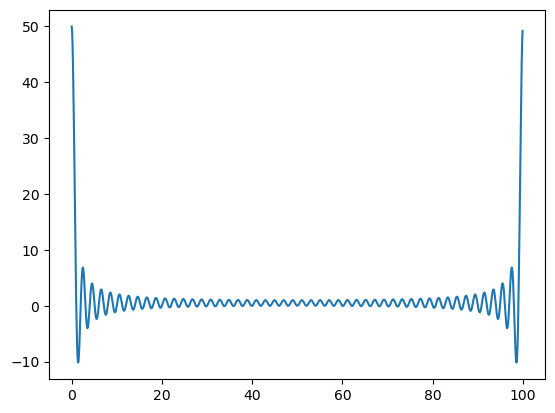

In [3]:
def fft(sig, fft_points, fs):
  fbin = fs/fft_points
  f = np.arange(0, fft_points) * fbin
  return f,  np.fft.fft(sig, fft_points)

def ifft(sig_fft):
  return np.real(np.fft.ifft(sig_fft))

width = 0.05
fs = 100
sampling_rate = 1000
pulse_samples = int(width * sampling_rate)
pulse = np.ones(pulse_samples)
f, sig_mag = fft(pulse, 1000, fs)
plt.plot(f, sig_mag)


# Basics [Q1]
Generate a Rectangular pulse and analyze the effect of varying the signal’s duration on its frequency magnitude spectrum.

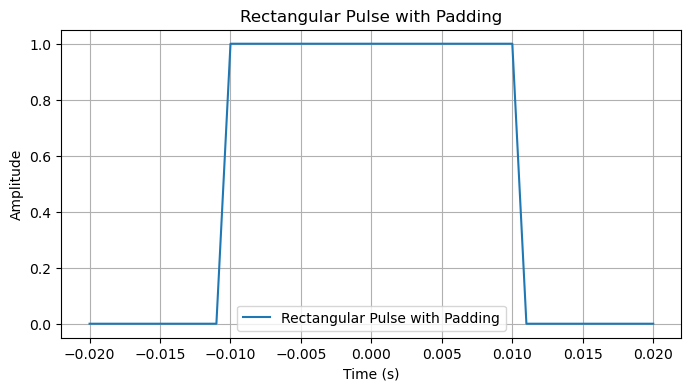

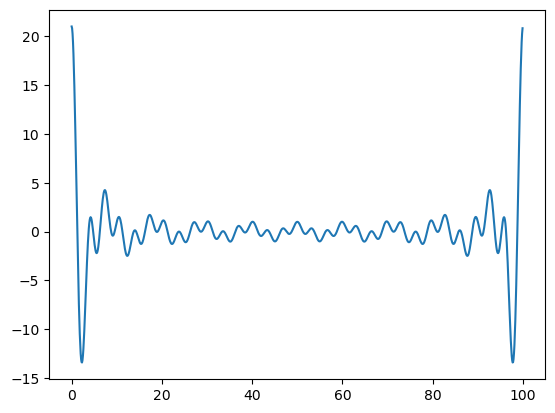

In [4]:
# Parameters
width = 0.02           # Pulse width in seconds
sampling_rate = 1000   # Sampling rate in Hz
zero_padding = 0.01    # Zero padding in seconds

# Generate rectangular pulse with padding
t, pulse = rectangular_pulse(width, sampling_rate, zero_padding)

# Plot the pulse
plt.figure(figsize=(8, 4))
plt.plot(t, pulse, label="Rectangular Pulse with Padding")
plt.title("Rectangular Pulse with Padding")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

f, sig_mag = fft(pulse, 1000, fs)
plt.plot(f, sig_mag)

- In Time domain, as the duration increases, the pulse becomes broader in the time domain
- In frequency domain, here the frequency changes when the pulse goes high and then remain contant and again changes.

# Basics [Q2]
Generate a Sinusoidal signal and analyze the effect of varying the signal’s
duration on its frequency magnitude spectrum.


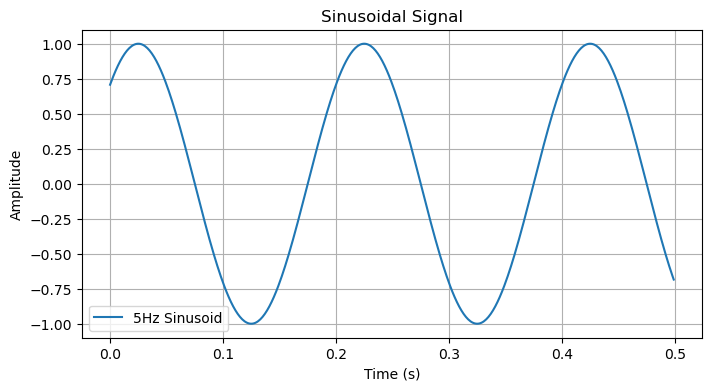

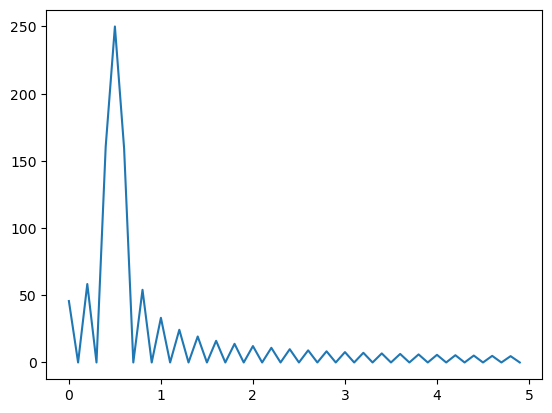

In [18]:
def generate_sinusoid(freq, sampling_rate, duration, phase=0):
    # Time vector
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    # Generate sinusoidal signal
    signal = np.sin(2 * np.pi * freq * t + phase)

    return t, signal

# Parameters
freq = 5            # Frequency in Hz
sampling_rate = 1000 # Sampling rate in Hz
duration = 0.5       # Duration in seconds
phase = np.pi / 4    # Phase in radians

# Generate sinusoidal signal
t, signal = generate_sinusoid(freq, sampling_rate, duration, phase)

# Plot the sinusoid
plt.figure(figsize=(8, 4))
plt.plot(t, signal, label=f"{freq}Hz Sinusoid")
plt.title("Sinusoidal Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

f, sig_mag = fft(signal, 1000, fs)
plt.plot(f[0:50], np.abs(sig_mag[0:50]))

- The signal completes 5 full cycles (oscillations) in 1 second.
- Each cycle corresponds to one repetition of the sine wave pattern.
- The signal is sampled 1000 times per second, meaning there are 1000 data points in the 1-second waveform.
- This high sampling rate ensures a smooth representation of the sinusoid (well above the Nyquist rate for a 5 Hz signal). 


500


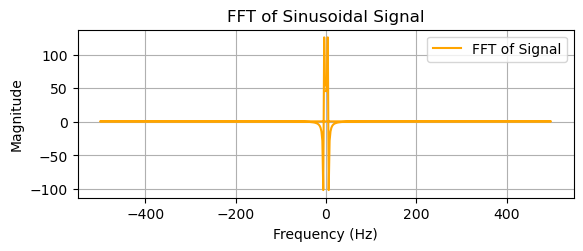

In [6]:
# Compute FFT
n = len(signal)
print(n)
fft_signal = np.fft.fft(signal)
frequencies = np.fft.fftfreq(n, 1/sampling_rate)

# Only take the positive half of the FFT and corresponding frequencies
# positive_frequencies = frequencies[:n // 2]
# positive_fft_signal = np.abs(fft_signal[:n // 2])

# Plot the FFT
plt.subplot(2, 1, 2)
plt.plot(frequencies, fft_signal, label="FFT of Signal", color='orange')
plt.title("FFT of Sinusoidal Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()

- The FFT will show two dominant peaks:
    - +5Hz (positive frequency).
    - -5Hz (negative frequency).
- Magnitude = 1000/2 = 500 (Without normalisation)

# Basics [Q3]
Generate a train of impulse
- Analyze the effect of varying the signal’s duration on its frequency magnitude
spectrum.
- Analyze the effect of varying the impulse period on its frequency magnitude
spectrum


In [7]:
def generate_impulse_train(period, duration, sampling_rate):

    # Total number of samples
    total_samples = int(duration * sampling_rate)

    # Time vector
    t = np.linspace(0, duration, total_samples, endpoint=False)

    # Initialize impulse train
    impulse_train = np.zeros(total_samples)

    # Calculate indices for impulses
    impulse_indices = np.arange(0, total_samples, int(period * sampling_rate))

    # Set impulses to 1 at the calculated indices
    impulse_train[impulse_indices] = 1

    return t, impulse_train

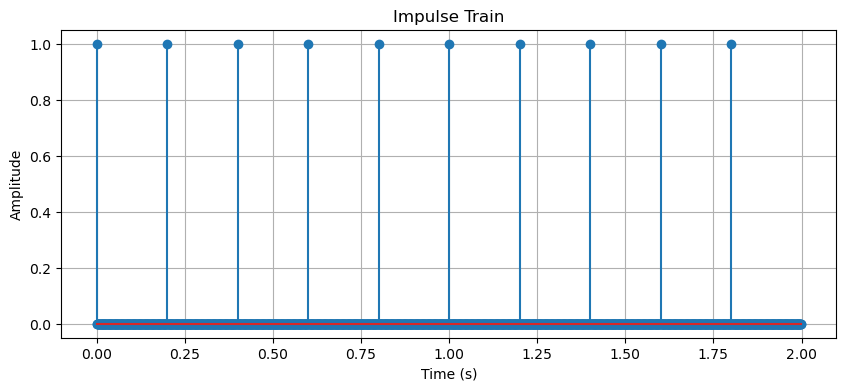

In [8]:
# Parameters
period = 0.2          # Period of impulses in seconds
duration = 2          # Total duration of the signal in seconds
sampling_rate = 1000  # Sampling rate in Hz

# Generate impulse train
t, impulse_train = generate_impulse_train(period, duration, sampling_rate)

# Plot the impulse train
plt.figure(figsize=(10, 4))
plt.stem(t, impulse_train)
plt.title("Impulse Train")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


### Analyze the effect of varying the signal’s duration on its frequency magnitude spectrum.


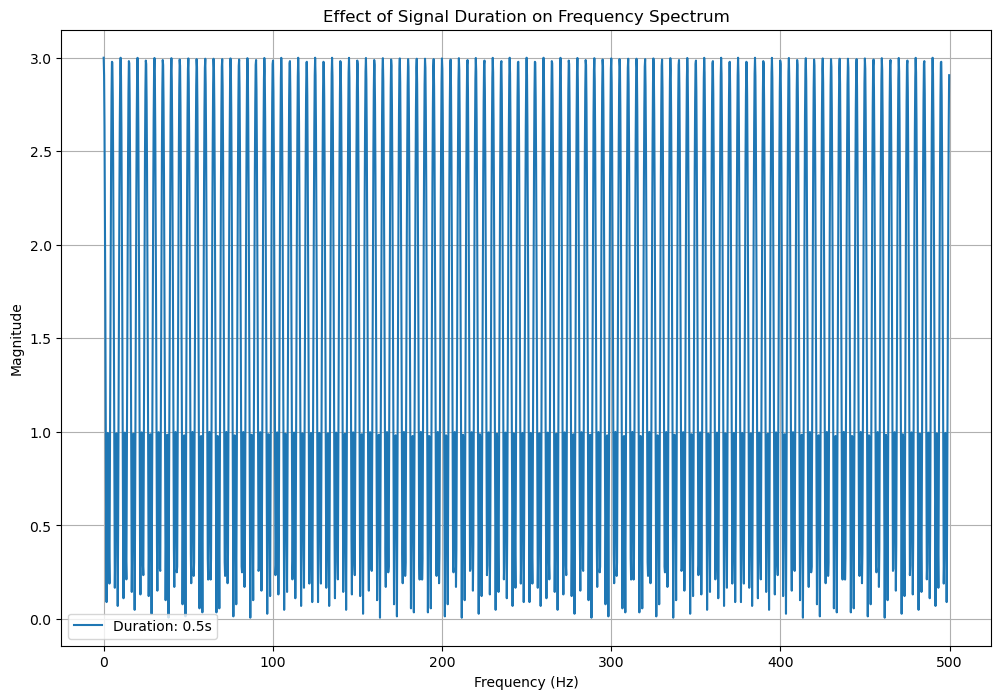

In [9]:
# Parameters
period = 0.2           # Impulse period in seconds
sampling_rate = 1000   # Sampling rate in Hz
fft_points = 4096      # Number of FFT points

# Analyze different durations
durations = [0.5]  # Signal durations in seconds
plt.figure(figsize=(12, 8))

for duration in durations:
    # Generate impulse train
    t, impulse_train = generate_impulse_train(period, duration, sampling_rate)
    
    # Compute FFT
    f, fft_output = fft(impulse_train, fft_points, sampling_rate)
    magnitude = np.abs(fft_output)[:fft_points // 2]  # Positive frequencies
    
    # Plot the magnitude spectrum
    plt.plot(f[:fft_points // 2], magnitude, label=f"Duration: {duration}s")

# Plot settings
plt.title("Effect of Signal Duration on Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()
plt.show()

- As the Fourier Transform represents a signal in terms of its frequency components, for periodic signals (like an impulse train), the spectrum consists of discrete peaks at harmonic frequencies.
- The resolution and sharpness of these peaks depend heavily on the signal's duration.

Here in the case of 0.5 sec duration, 
- The signal consists of fewer impulses (only 3 impulses). Thus there are poor separation of closely spaced frequencies. This may come as noise. 

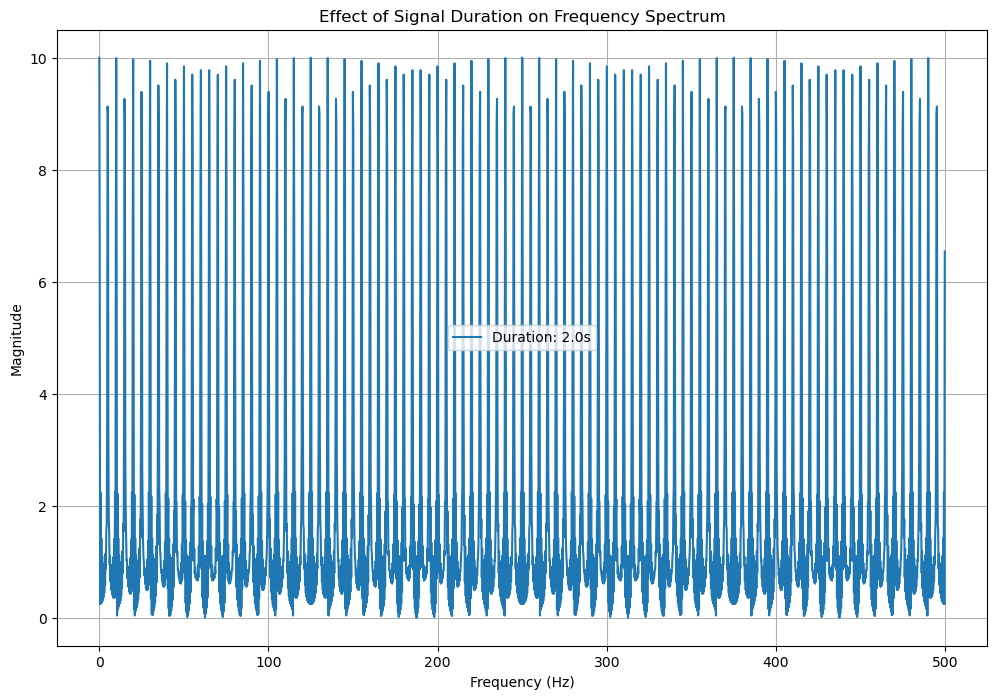

In [10]:
# Analyze different durations
durations = [2.0]  # Signal durations in seconds
plt.figure(figsize=(12, 8))

for duration in durations:
    # Generate impulse train
    t, impulse_train = generate_impulse_train(period, duration, sampling_rate)
    
    # Compute FFT
    f, fft_output = fft(impulse_train, fft_points, sampling_rate)
    magnitude = np.abs(fft_output)[:fft_points // 2]  # Positive frequencies
    
    # Plot the magnitude spectrum
    plt.plot(f[:fft_points // 2], magnitude, label=f"Duration: {duration}s")

# Plot settings
plt.title("Effect of Signal Duration on Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()
plt.show()

Here in the case of 2.0 sec duration, 
- The signal consists of more impulses (10 approx). Thus there is good separation of frequencies. This lead to improved frequencies.

This demonstrates how increasing the signal's duration improves the frequency spectrum’s accuracy and sharpness. 

### Analyze the effect of varying the impulse period on its frequency magnitude spectrum

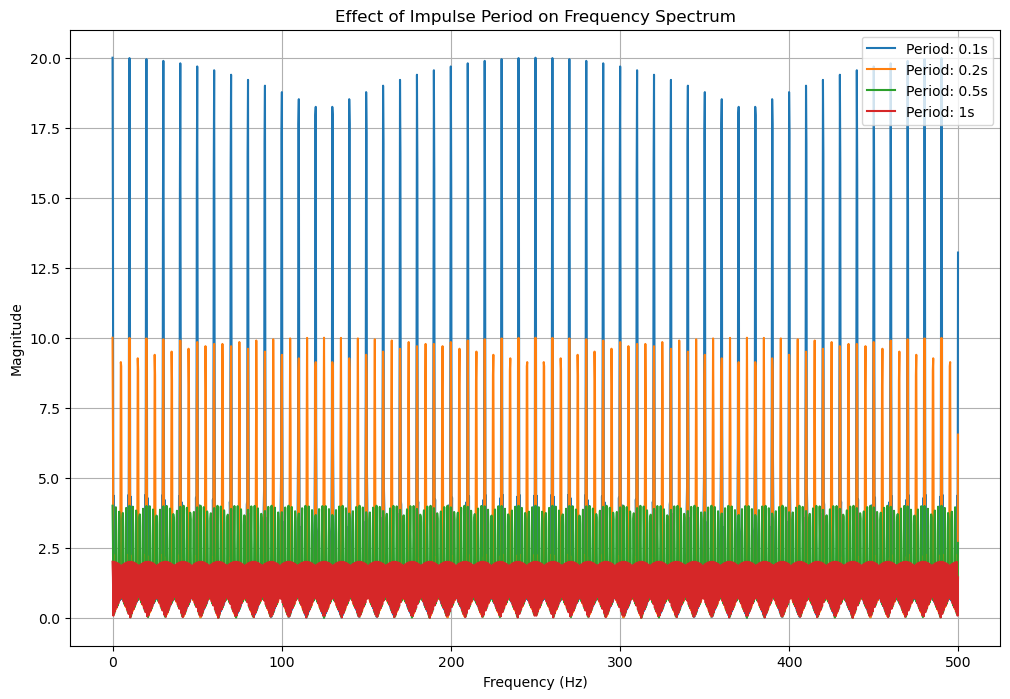

In [11]:
# Parameters
sampling_rate = 1000   # Sampling rate in Hz
duration = 2           # Signal duration in seconds
fft_points = 4096      # Number of FFT points
periods = [0.1, 0.2, 0.5, 1]  # Varying impulse periods

plt.figure(figsize=(12, 8))

for period in periods:
    # Generate impulse train
    t, impulse_train = generate_impulse_train(period, duration, sampling_rate)
    
    # Compute FFT
    f, fft_output = fft(impulse_train, fft_points, sampling_rate)
    magnitude = np.abs(fft_output)[:fft_points // 2]  # Positive frequencies
    
    # Plot the magnitude spectrum
    plt.plot(f[:fft_points // 2], magnitude, label=f"Period: {period}s")

# Plot settings
plt.title("Effect of Impulse Period on Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()
plt.show()

By varying the period of the impulses, the spacing between impulses in the time domain is modified. f = 1/T. This determines the spacing between the peaks.
- As the period decreases, the energy spreads across a larger frequency range, and the  peaks become more distinct and widely spaced.
- As the period increases, the energy is concentrated at lower frequencies, and  peaks are closer together.

# Basics [Q4]
Verify the property that multiplication in the time domain results in convolution in the frequency domain.
• x1[n]x2[n] → X1(ejw) ∗ X2(ejw)

Multiplication in the time domain corresponds to convolution in the frequency domain.

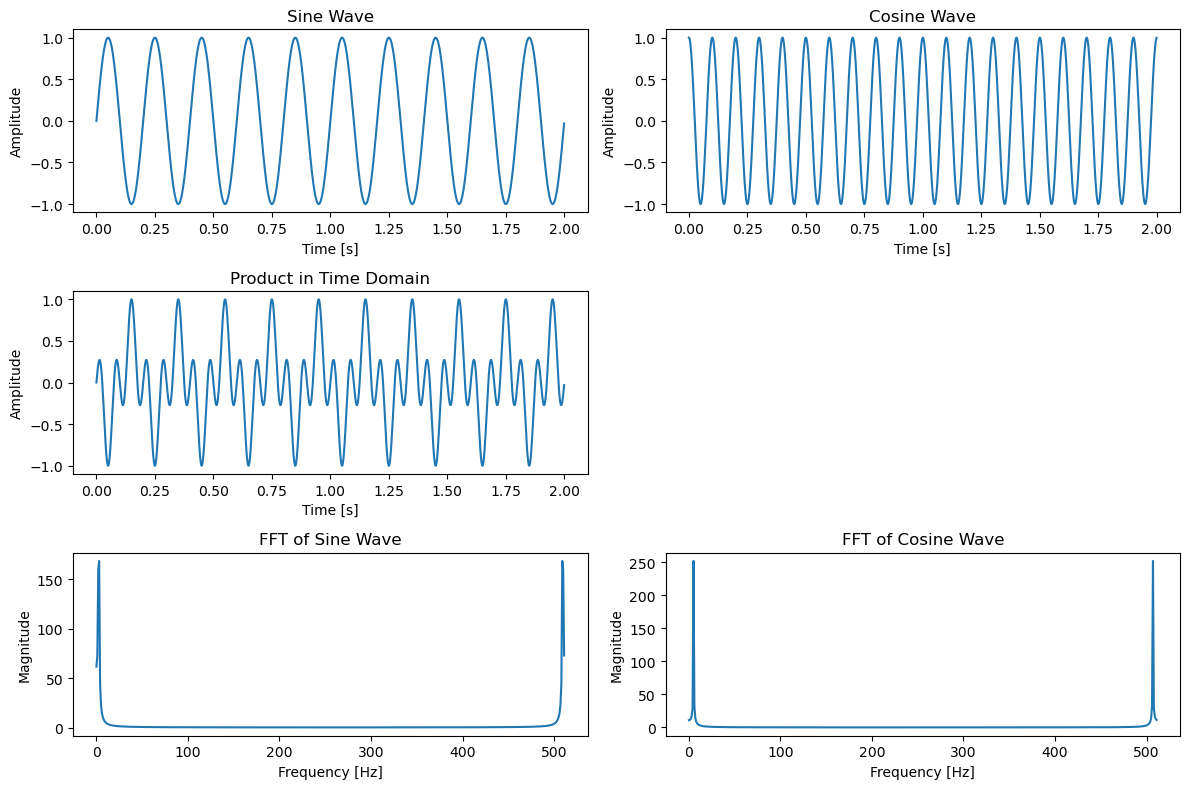

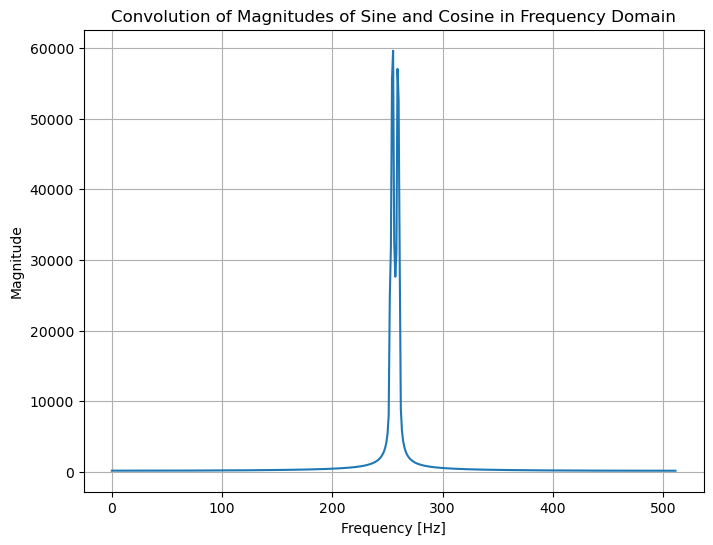

In [12]:

# Parameters for sine and cosine waves
sampling_rate = 1000  # Sampling rate in Hz
duration = 2          # Duration of the signal in seconds
fft_points = 512      # Number of FFT points
frequency_1 = 5       # Frequency of sine wave in Hz
frequency_2 = 10      # Frequency of cosine wave in Hz

# Time vector
n = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sine and cosine waves
sin_wave = np.sin(2 * np.pi * frequency_1 * n)  # Sine wave
cos_wave = np.cos(2 * np.pi * frequency_2 * n)  # Cosine wave

# Multiply the two signals in the time domain (product)
time_domain_product = sin_wave * cos_wave

# Compute the FFT of the product in time domain
f, fft_product = fft(time_domain_product, fft_points, sampling_rate)
#magnitude_product = np.abs(fft_product)[:fft_points // 2]

# Compute the FFT of the individual signals (sine and cosine)
# fft_sin = np.fft.fft(sin_wave, fft_points)
#fft_cos = np.fft.fft(cos_wave, fft_points)
fft_sin_t, fft_sin = fft(sin_wave, fft_points, sampling_rate)
fft_cos_t, fft_cos = fft(cos_wave, fft_points, sampling_rate)

# Convolution of the individual frequency-domain signals
conv_X = np.convolve(np.abs(fft_sin), np.abs(fft_cos), mode='same')

# Plotting the time-domain signals and their product
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(n, sin_wave, label=f'Sine Wave {frequency_1} Hz')
plt.title('Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 2)
plt.plot(n, cos_wave, label=f'Cosine Wave {frequency_2} Hz')
plt.title('Cosine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(3, 2, 3)
plt.plot(n, time_domain_product, label='Product of Sine and Cosine')
plt.title('Product in Time Domain')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# # Plotting the frequency domain (FFT results)
# plt.subplot(3, 2, 4)
# plt.plot(fft_product, label='FFT of Product (Time Domain)')
# plt.title('FFT of Product in Time Domain')
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Magnitude')

plt.subplot(3, 2, 5)
plt.plot(np.abs(fft_sin), label='FFT of Sine Wave')
plt.title('FFT of Sine Wave')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.subplot(3, 2, 6)
plt.plot(np.abs(fft_cos), label='FFT of Cosine Wave')
plt.title('FFT of Cosine Wave')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# Plot Convolution of Frequency Domain Signals
plt.figure(figsize=(8, 6))
plt.plot(conv_X, label='Convolution of |FFT(Sine)| and |FFT(Cosine)|')
plt.title('Convolution of Magnitudes of Sine and Cosine in Frequency Domain')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


- Two simple discrete-time signals: a sine wave (x1) and a cosine wave (x2) are generated.
- Then the product of x1[n] and x2[n] is computed to create y[n]. 

Then Fourier Transforms are calculated for both x1[n] and x2[n].
- Then convolution is done for the FFTs of x1 and x2 to verify the frequency-domain convolution.

The graphs look different because convolution in the frequency domain is a process of combining frequency components over a range, which is inherently different from pointwise multiplication in the time domain. Multiplying in the time domain corresponds to convolution in the frequency domain, but the shapes of the results in the two domains can appear different due to the nature of these operations


# Samapling in time [Q1]
Generate a sinusoid signal with
signal frequency = 5Hz
duration = 1sec
sampling rates = [10Hz, 20HZ, 50Hz, 100HZ]
- plot time domain and freqeuncy magntiude spectrum, for all 4 signals
- Use plt.stem for discrete time signals and plt.plot for continous time signals
- Utilize the provided FFT function

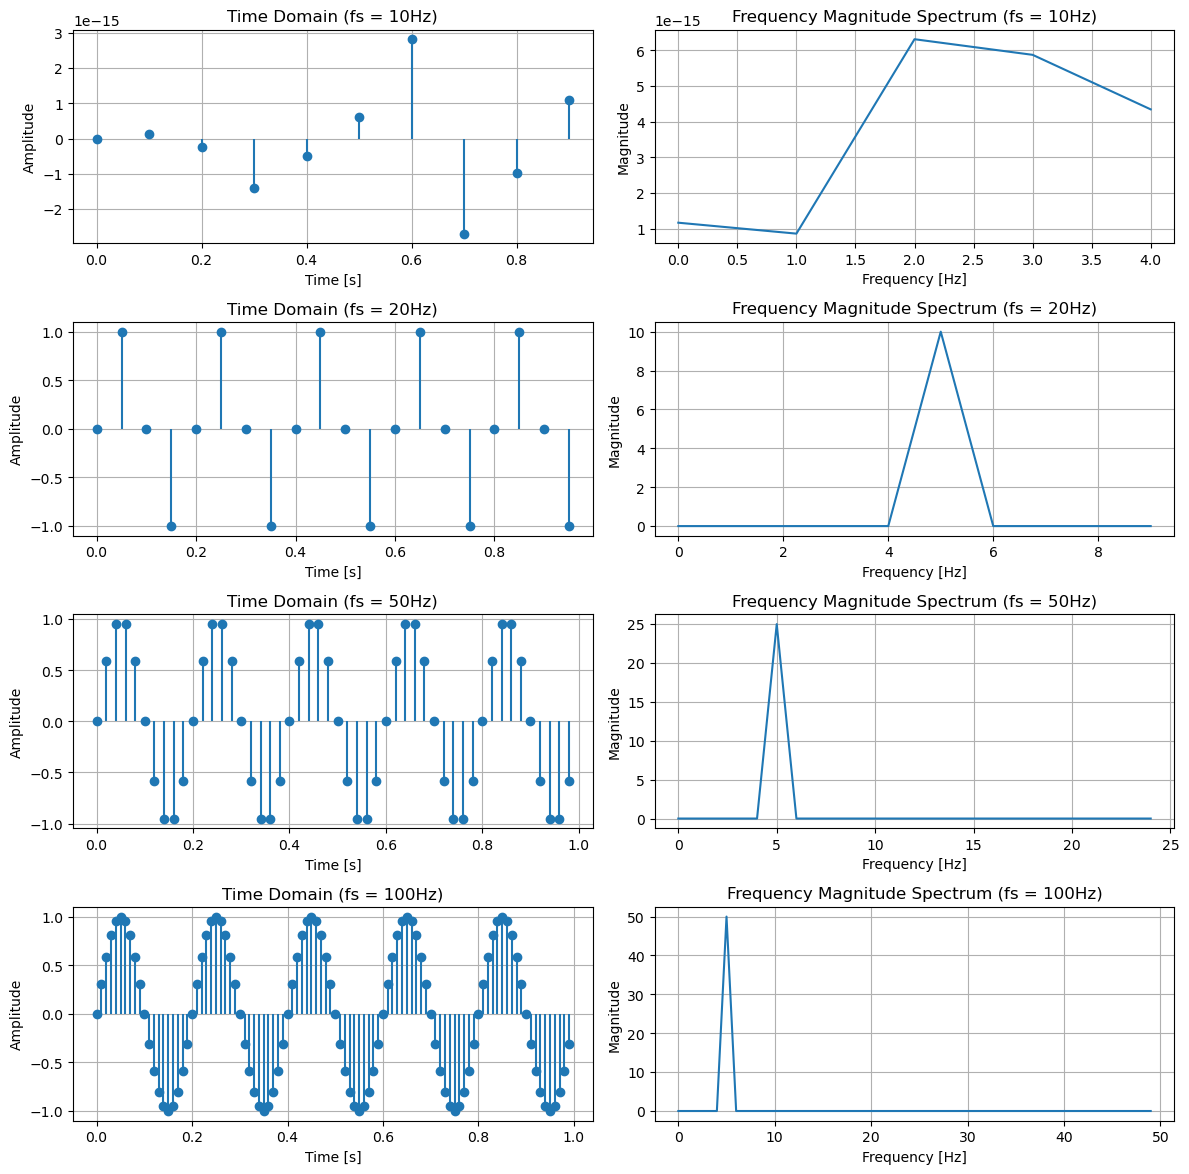

In [13]:
# Parameters
signal_freq = 5    # Signal frequency in Hz
duration = 1       # Duration in seconds
sampling_rates = [10, 20, 50, 100]  # Different sampling rates

# Plotting Setup
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

# Generate and plot for each sampling rate
for i, fs in enumerate(sampling_rates):
    # Generate the time vector
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    
    # Generate the sinusoidal signal
    signal = np.sin(2 * np.pi * signal_freq * t)

    # Time-domain plot (Discrete using stem)
    axs[i, 0].stem(t, signal, basefmt=" ")
    axs[i, 0].set_title(f"Time Domain (fs = {fs}Hz)")
    axs[i, 0].set_xlabel("Time [s]")
    axs[i, 0].set_ylabel("Amplitude")
    axs[i, 0].grid(True)

    # Compute FFT using the provided function
    fft_points = len(signal)
    f, fft_signal = fft(signal, fft_points, fs)

    # Frequency domain plot (Magnitude spectrum using plot)
    axs[i, 1].plot(f[:fft_points // 2], np.abs(fft_signal[:fft_points // 2]))
    axs[i, 1].set_title(f"Frequency Magnitude Spectrum (fs = {fs}Hz)")
    axs[i, 1].set_xlabel("Frequency [Hz]")
    axs[i, 1].set_ylabel("Magnitude")
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()


- For time-domain plots, there will be the discrete sinusoidal signals sampled at different rates.
- For frequency-domain plots, the magnitude spectrum will show the frequency component of the sinusoidal signal (a peak at 5 Hz for all cases), but the resolution of the spectrum will vary based on the sampling rate.

# Sampling in time [Q2]
Simulate Aliasing in frequency domain
- Plot time and magnitude spectrum: with alias and without alias
- Use sinusoidal signals for simulation.

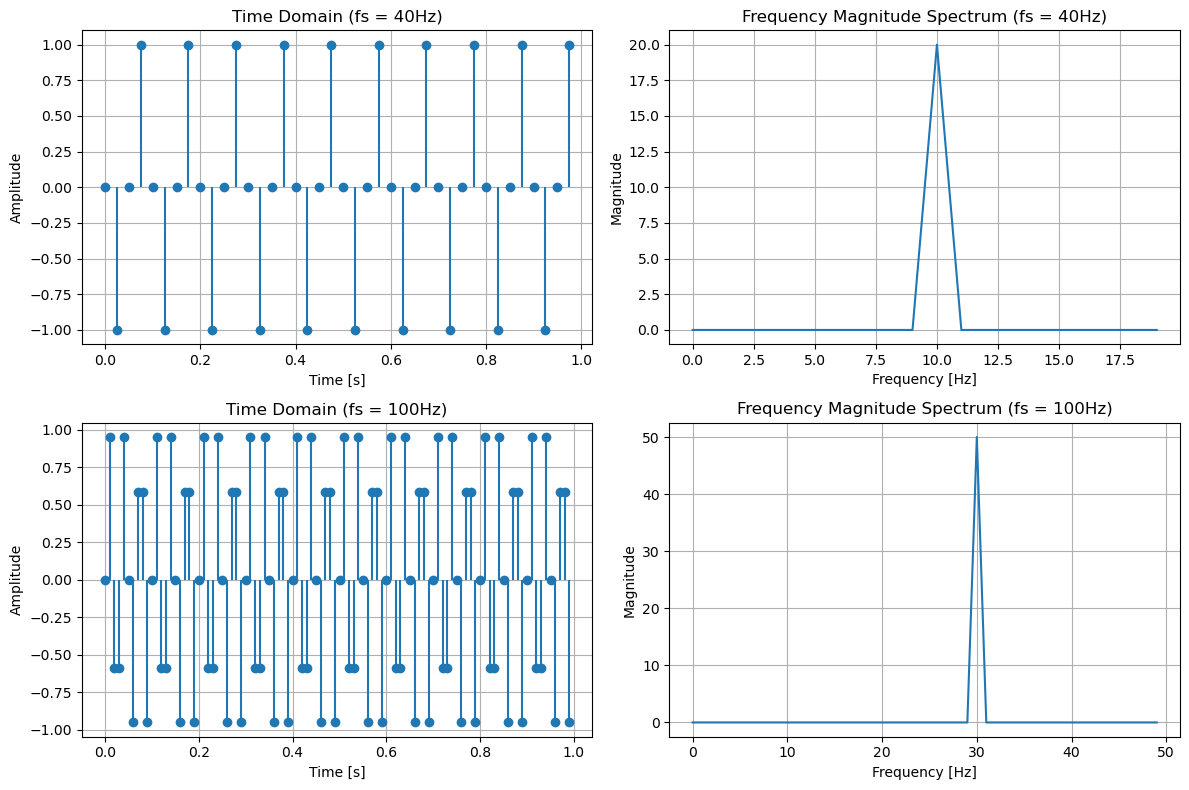

In [14]:
# Parameters
signal_freq = 30    # Signal frequency in Hz
duration = 1        # Duration in seconds
sampling_rates = [40, 100]  # Sampling rates (with aliasing, without aliasing)

# Create a figure for the plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Generate and plot for each sampling rate
for i, fs in enumerate(sampling_rates):
    # Generate the time vector
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    
    # Generate the sinusoidal signal
    signal = np.sin(2 * np.pi * signal_freq * t)

    # Time-domain plot (Discrete using stem)
    axs[i, 0].stem(t, signal, basefmt=" ")
    axs[i, 0].set_title(f"Time Domain (fs = {fs}Hz)")
    axs[i, 0].set_xlabel("Time [s]")
    axs[i, 0].set_ylabel("Amplitude")
    axs[i, 0].grid(True)

    # Compute FFT using the provided function
    fft_points = len(signal)
    f, fft_signal = fft(signal, fft_points, fs)

    # Frequency domain plot (Magnitude spectrum using plot)
    axs[i, 1].plot(f[:fft_points // 2], np.abs(fft_signal[:fft_points // 2]))
    axs[i, 1].set_title(f"Frequency Magnitude Spectrum (fs = {fs}Hz)")
    axs[i, 1].set_xlabel("Frequency [Hz]")
    axs[i, 1].set_ylabel("Magnitude")
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()


In this set up, Signal Frequency: 30 Hz
For this, the Sampling Rates are:
- Without aliasing: 100 Hz (greater than twice the signal frequency).
- With aliasing: 40 Hz (less than twice the signal frequency).


### For the Time-domain:
- For 40 Hz sampling rate (with aliasing), - a distorted version of the signal.
- For 100 Hz sampling rate (without aliasing), the signal will appear as expected, matching the original sinusoid .

### Frequency-domain (Magnitude Spectrum):
- For the 40 Hz sampling rate, aliasing is noticed where the frequency spectrum folds back into lower frequencies. (10 instead of 30)
- For the 100 Hz sampling rate, the original frequency without aliasing is noticed (30Hz)

# Sampling in time [Q3]
Record speech signal
- x[n] : 16KHz
y[n]=x[2n]
→ y[n] : 8KHz
•
x[n] : 16KHz
resample
→ y[n] : 8KHz
• Comment on Perceptual obervation

In [15]:
import torch
import torchaudio
import os
from matplotlib import pyplot as plt
import torchaudio.transforms as T

def get_metadata(wav_path):
  metadata = torchaudio.info(wav_path)
  print(metadata)

def wav_read(wav_path):
  wav, fs= torchaudio.load(wav_path)
  if wav.shape[0] > 1:
    wav = wav[0,:]
  return wav, fs

def plot_time_domain(wav):
  # Selecting only one channel
  plt.plot(wav)
  plt.xlabel('time')
  plt.ylabel('amplitude')
  plt.show()

wav_path = "audio_16k.wav"
get_metadata(wav_path)
wav, fs = wav_read(wav_path)
plot_time_domain(wav)

RuntimeError: Couldn't find appropriate backend to handle uri audio_16k.wav and format None.

In [ ]:
from IPython.display import Audio
Audio(wav.numpy(), rate=fs)

In [ ]:
import torchaudio.transforms as T
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

def resample(wav, original_fs, new_fs):
    sample_rate = original_fs
    resample_rate = new_fs
    resampler = T.Resample(sample_rate, resample_rate)
    resampled_waveform = resampler(wav)
    return resampled_waveform, new_fs
# Saving file
def save_audio(path, wav, fs=16000, bits_per_sample=16):
    torchaudio.save(path, wav.unsqueeze(0), fs, bits_per_sample)

def fft_plot(wav, start, end, fs):
    frame = wav[int(start*fs):int((end)*fs)]
    N = frame.shape[-1]
    print(frame.shape)
    frame_fft = np.fft.fft(frame)
    frame_fft_abs = np.abs(frame_fft)
    plt.subplot(2,1,1)
    plt.plot(frame)
    plt.xlabel('time')
    plt.ylabel('amplitude')
    plt.subplot(2,1,2)
    x_axis = np.arange(frame.shape[-1]//2) * fs / N
    plt.plot(x_axis, 20 * np.log10(frame_fft_abs)[:frame.shape[-1]//2])
    plt.xlabel('frequency')
    plt.ylabel('magnitude')
    plt.show()

Resampled audio saved at: downsampled_audio\audio_resampled_8000Hz.wav
torch.Size([73982])


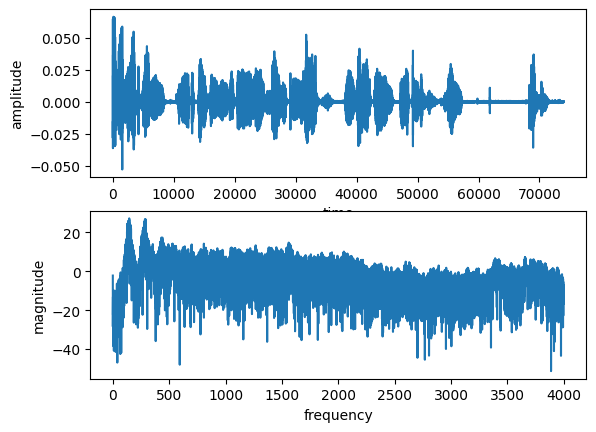

Downsampled audio saved at: downsampled_audio\audio_downsampled_8000Hz.wav
torch.Size([73982])


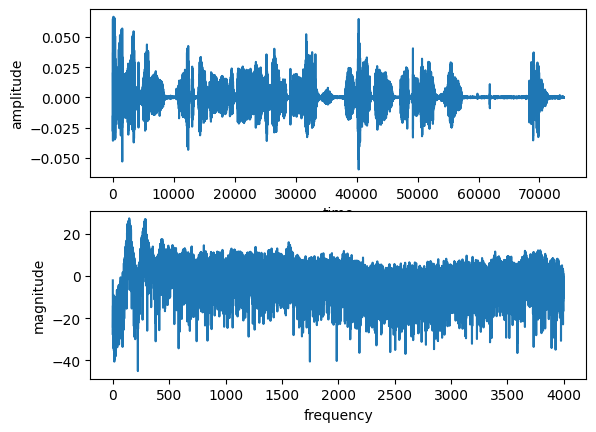

In [ ]:
# Downsampling function (decimation)
def downsample(wav, original_fs, target_fs):
    factor = original_fs // target_fs
    # Select every `factor`-th sample to downsample (1D waveform)
    downsampled_waveform = wav[::factor]
    return downsampled_waveform, target_fs


# Downsampling and resampling experiment
output_directory = "downsampled_audio"   # Replace with your desired output directory
sampling_rates = [8000]     # Sampling rates to test

# Load original waveform (for example purposes, assuming you have 'wav' and 'fs')
# wav, fs = torchaudio.load("path_to_your_audio_file")

# Resample and downsample
for sampling_rate in sampling_rates:
    # Resampling
    resampled_waveform_new, new_fs = resample(wav, fs, new_fs=sampling_rate)
    output_file_resampled = os.path.join(output_directory, f"audio_resampled_{sampling_rate}Hz.wav")
    save_audio(output_file_resampled, resampled_waveform_new, sampling_rate, 16)
    print(f"Resampled audio saved at: {output_file_resampled}")
    
    # Plot FFT for resampled audio
    start = 2  # Seconds
    end = 21  # Seconds
    fft_plot(resampled_waveform_new, start=start, end=end, fs=sampling_rate)

    # # Downsampling (decimation)
    downsampled_waveform, downsampled_fs = downsample(wav, fs, target_fs=sampling_rate)
    output_file_downsampled = os.path.join(output_directory, f"audio_downsampled_{sampling_rate}Hz.wav")
    save_audio(output_file_downsampled, downsampled_waveform, sampling_rate, 16)
    print(f"Downsampled audio saved at: {output_file_downsampled}")
    
    # Plot FFT for downsampled audio
    fft_plot(downsampled_waveform, start=start, end=end, fs=sampling_rate)


In [ ]:
# Resampled Audio 
from IPython.display import Audio

wav_path = "downsampled_audio\\audio_resampled_8000Hz.wav"
wav, fs = torchaudio.load(wav_path)
Audio(wav.numpy(), rate=fs)


In [ ]:
# Resampled Audio 
from IPython.display import Audio

wav_path = "downsampled_audio\\audio_downsampled_8000Hz.wav"
wav, fs = torchaudio.load(wav_path)
Audio(wav.numpy(), rate=fs)

#### Downsampling:

- The output signal is sounding distorted  due to aliasing.
- High-frequency components of the original 16 kHz signal will overlap in the lower frequency range, causing artifacts.

#### Resampling:
- The output signal is sounding much cleaner and closer to the original signal, with minimal perceptual loss.
- The filtering step removes frequencies above 4 kHz (Nyquist frequency for 8 kHz sampling), ensuring no aliasing occurs.


# Sampling in frequency [Q1]
Review the given simulation of frequency-domain sampling. Understand the theory and the simulation provided, and write your observations based on your analysis.

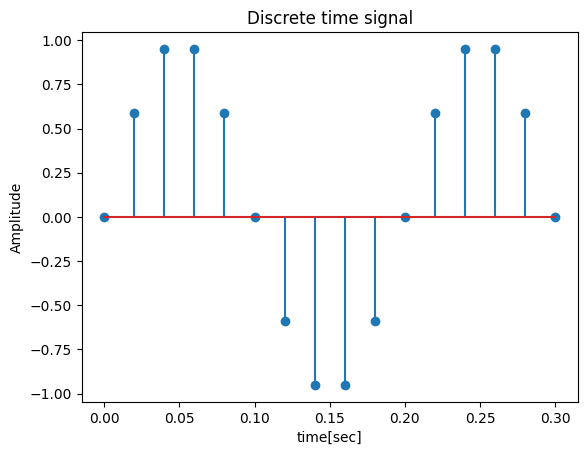

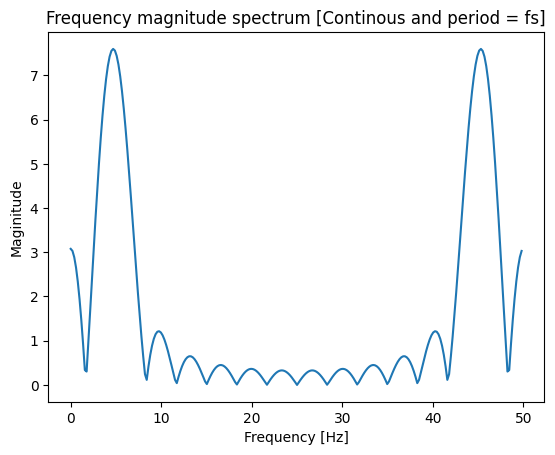

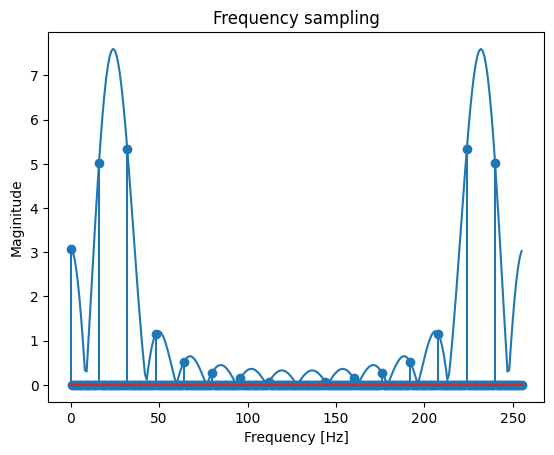

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f = 5  # Frequency of the sinusoid in Hz
fs = 50  # Sampling frequency in Hz
cycles = 1.5  # Number of cycles

# Time array
T = 1 / f  # Period of the sinusoid
t = np.arange(0, cycles * T, 1 / fs)  # Time values for 5 cycles

# Generate the sinusoid
sinusoid = np.sin(2 * np.pi * f * t)

#FFT
f, sin_fft = fft(sinusoid, 256, fs)

#Sampling freq domain
mask = np.zeros(sin_fft.shape)
index = np.arange(0, mask.shape[-1], 16)
mask[index] = 1
sin_fft_downsample = sin_fft*mask

# Reconstruction of signal, ifft
sin_abs = np.abs(sin_fft_downsample)
sinfft_16 = sin_fft_downsample[sin_abs>0]
recon_sin = ifft(sinfft_16)


plt.stem(t, sinusoid)
plt.xlabel('time[sec]')
plt.ylabel('Amplitude')
plt.title('Discrete time signal')
plt.show()

plt.plot(f, np.abs(sin_fft))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Maginitude')
plt.title('Frequency magnitude spectrum [Continous and period = fs]')
plt.show()

plt.plot(np.abs(sin_fft))
plt.stem(np.abs(sin_fft_downsample))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Maginitude')
plt.title('Frequency sampling')
plt.show()

- The sinusoidal signal has a frequency of 5Hz, so the FFT correctly identifies a strong component at this frequency.
- The FFT output represents frequencies from 0 Hz to 50 Hz in a circular manner. 
- For real-valued signals, the frequecnies above 25Hz is mirrored back due to alisasing. They are 50 - 5 = 45. So there is a peak at 45Hz.
- Here the sampling frequency is 50Hz, so maximum frequency which can be used here is 25Hz. But here the sinusoidal has 5Hz. So real information is present in 5Hz.
- Thus here the sampling is without alisasing. 
- Here an attempt is made to reconstruct the signal from the sampled frequency components by applying the inverse FFT (ifft).

# Sampling in frequency [Q2]
Simulate aliasing in time domain
• x[n] :FFT → X[k]
• Y [k] :
↓2
← X[k]
• y[n] IFFT → Y [k]
• Use sinusoid signal, plots: time and freq. domain

c:\Users\ghs6kor\.conda\envs\sampleProject\lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ghs6kor\.conda\envs\sampleProject\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


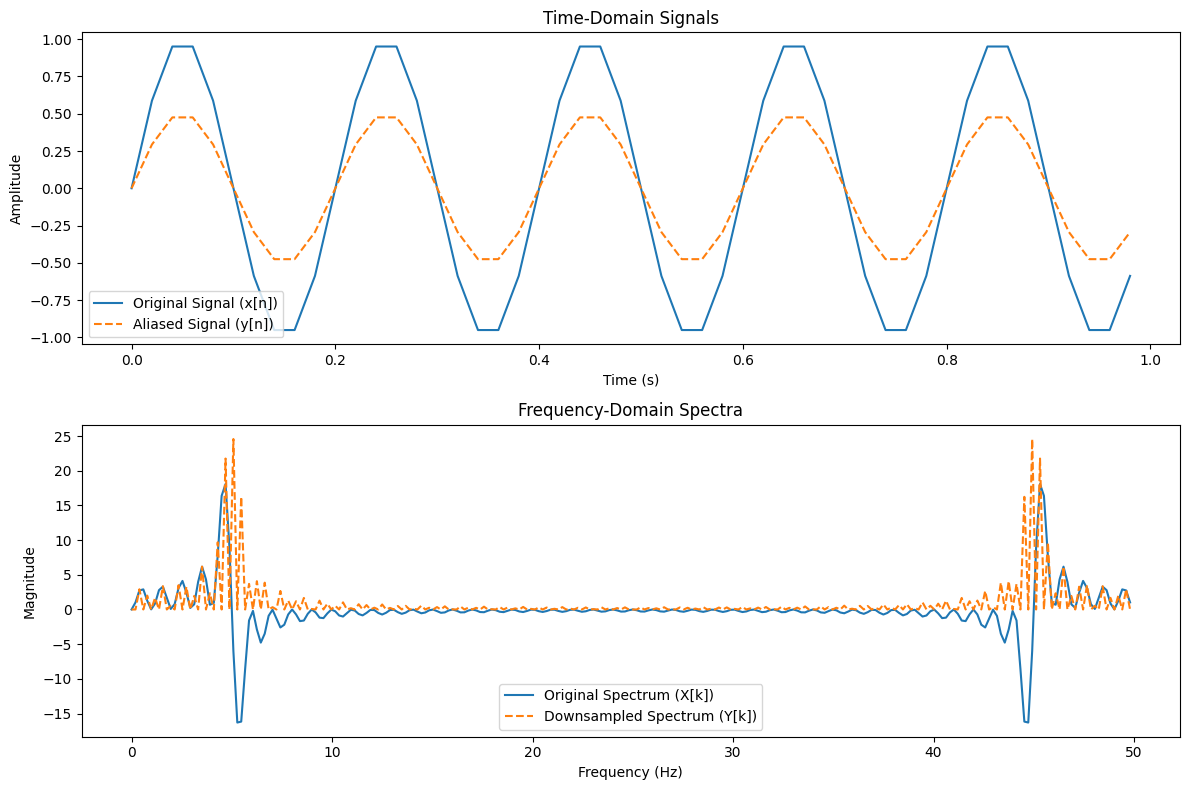

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f = 5  # Frequency of the sinusoidal signal (Hz)
fs = 50  # Sampling frequency (Hz)
duration = 1  # Signal duration (seconds)

# Generate the original sinusoidal signal x[n]
t = np.arange(0, duration, 1 / fs)  # Time vector
x = np.sin(2 * np.pi * f * t)

# Compute FFT of x[n]
n = len(x)
freqs, X = fft(x, 256, fs)

# Downsample in the frequency domain (take every 2nd sample of X[k])
Y = np.zeros_like(X)
Y[::2] = X[::2]

# Compute IFFT to get the aliased signal y[n]
y = ifft(Y)

# Plot results
plt.figure(figsize=(12, 8))

# Time domain: Original and Aliased signals
plt.subplot(2, 1, 1)
plt.plot(t, x, label="Original Signal (x[n])")
plt.plot(t, np.real(y[:len(t)]), label="Aliased Signal (y[n])", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Time-Domain Signals")

# Frequency domain: Original and Downsampled spectra
plt.subplot(2, 1, 2)
plt.plot(freqs, X, label="Original Spectrum (X[k])")
plt.plot(freqs, np.abs(Y), label="Downsampled Spectrum (Y[k])", linestyle="--")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.title("Frequency-Domain Spectra")

plt.tight_layout()
plt.show()


- In time domain
    - The aliased signal has some distortions compared to the original one because it reduces resolution of signal.
- In frequency domain
    - The downsampled spectrum shows reduction in resolution wrt to downsampling rate (2 spikes in 1)